<a href="https://colab.research.google.com/github/julius-kazibwe/Group_E_Fingerprint_ML_Project/blob/master/Group_E_Fingerprint_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Fingerprint analysis and classification is a fascinating field within computer vision, playing a crucial role in various applications such as security, authentication, and identification. In this exploration, we delve into the realm of fingerprint gender classification using machine learning techniques. Our aim is to develop a model that can accurately predict the gender of individuals from fingerprint images, contributing to a diverse range of real-world applications.

Dataset Overview:

Our dataset comprises a collection of altered and real fingerprint images. Altered images include variations induced by different levels of difficulty, categorized as "Easy," "Medium," and "Hard." Additionally, the dataset contains genuine fingerprint images categorized as "Real." Each image is associated with a label indicating gender.


# Import libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import random
import os
import cv2

import matplotlib.pyplot as plt

Import Google Drive Mount Function(Mount Google Drive)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This code snippet above enables you to seamlessly integrate your Google Drive storage with your Colab notebook, making it convenient to work with files and datasets stored in Google Drive while using the Colab environment for coding and analysis.

# Dataset extraction

In [5]:
import zipfile

# Define the path of the ZIP file in your Google Drive
zip_file_path = '/content/drive/My Drive/Colab Notebooks/fingerprint_datasets.zip'

# Define the folder where you want to extract the dataset
extracted_folder_path = '/content/dataset/'

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print('Dataset extracted successfully!')


Dataset extracted successfully!


In [6]:
# List all files in the dataset folder
file_list = os.listdir(extracted_folder_path)
print(file_list)


['fingerprint_datasets']


In [7]:
# Define the path to the 'fingerprint_datasets' folder in your Colab environment
dataset_folder_path = '/content/dataset/fingerprint_datasets/'

# List all files in the 'fingerprint_datasets' folder
file_list = os.listdir(dataset_folder_path)

# Print the list of files
print(file_list)


['Altered', 'Real']


# Gender and Hand Orientation Label Extraction

In [8]:
def extract_label(img_path,train = True):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')

    if train:
      gender, lr, finger, _, _ = etc.split('_')
    else:
      gender, lr, finger, _ = etc.split('_')

    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1

    if finger == 'thumb':
      finger = 0
    elif finger == 'index':
      finger = 1
    elif finger == 'middle':
      finger = 2
    elif finger == 'ring':
      finger = 3
    elif finger == 'little':
      finger = 4
    return np.array([gender], dtype=np.uint16)

# Function Purpose:
This function extracts label information from the filename of a fingerprint image. The extracted label is used to categorize the image's gender, handedness (left or right), and finger type (thumb, index, middle, ring, little).

# Filename Parsing:
The function starts by splitting the filename into two components using the double underscore ("__") as a separator. The first component, subject_id, is extracted for further analysis, while the second component, etc, contains gender, handedness, finger type, and other information.

# Label Extraction:
Depending on whether the function is being used for training (train=True) or testing (train=False), the code extracts information from etc to determine gender (gender), handedness (lr), and finger type (finger).

# Encoding:
Gender: The gender information is encoded as a numeric label. 'M' (male) is encoded as 0, and 'F' (female) is encoded as 1.
Handedness: The handedness information is encoded as a binary value. 'Left' is encoded as 0, and 'Right' is encoded as 1.
Finger Type: The finger type information is encoded numerically: 'thumb' is 0, 'index' is 1, 'middle' is 2, 'ring' is 3, and 'little' is 4.

# Image Loading and Labeling

In [9]:
img_size = 96


def loading_data(path,boolean):
    data = []
    for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img),boolean)

            data.append([label[0], img_resize ])
            if len(data) % 1000 == 0:
                print(len(data))
    return data

This code segment prepares image data for gender classification tasks by resizing images, extracting relevant labels, and assembling labeled data pairs. The process ensures data uniformity and is optimized for efficient data handling in machine learning workflows.

# Image Loading and Resizing:
The loading_data function processes images in the specified path.
Each image is read using OpenCV in grayscale mode (cv2.IMREAD_GRAYSCALE).
Images are resized to a uniform img_size using cv2.resize.

# Label Extraction:
The extract_label function is applied to each image path to generate label information based on gender and hand orientation.

# Data Composition:
Extracted labels and resized images are combined into a data list.
This data list is continuously built as images are processed.

# Progress Monitoring:
A progress tracker is included (if len(data) % 1000 == 0) to print the number of processed images at specific intervals.

# Output:
The function returns the composed data list, containing both label and resized image pairs.






# Data Path Configuration

In [10]:
Easy_path = os.path.join(dataset_folder_path, 'Altered', 'Altered-Easy')
Medium_path = os.path.join(dataset_folder_path, 'Altered', 'Altered-Medium')
Hard_path = os.path.join(dataset_folder_path, 'Altered', 'Altered-Hard')
Real_path = os.path.join(dataset_folder_path, 'Real')


This code segment establishes paths for different subsets of the dataset, categorizing them by difficulty levels and authenticity. By configuring paths for easy, medium, hard altered images, and real images, it sets the groundwork for efficient data management. Here's a succinct explanation:

# Data Paths:
Four paths are defined, each corresponding to a distinct subset of the dataset.
Easy_path, Medium_path, and Hard_path point to altered images categorized by difficulty levels.
Real_path points to authentic, unaltered images.

# Path Composition:
The os.path.join function is used to construct complete paths based on the provided dataset_folder_path and subdirectories ('Altered', 'Altered-Easy', etc.).

# Purpose:
These paths facilitate organized data access during tasks such as loading, preprocessing, and training.
By categorizing data based on difficulty and authenticity, the paths streamline data handling and analysis.

# Data Combination for Analysis

In [11]:
# Combine images from different paths
combined_data = []


Easy_images= loading_data(Easy_path, True)
combined_data.extend(Easy_images)

Medium_images = loading_data(Medium_path, True)
combined_data.extend(Medium_images)

Hard_images = loading_data(Hard_path, True)
combined_data.extend(Hard_images)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


This code snippet compiles image data from various paths, effectively combining images of different difficulty levels into a single dataset. The unified dataset streamlines subsequent tasks and enables a comprehensive analysis of fingerprint images across varying challenges.

# Data Aggregation and Labeling

In [12]:
img, labels = [], []

# Iterate through combined_data to populate img and labels lists
for data_array in combined_data:
    label, feature = data_array
    labels.append(label)
    img.append(feature)


This code segment efficiently prepares labeled data by extracting features and labels from the combined_data array. The resulting img and labels lists are essential components for subsequent model development and evaluation.

# Data Preprocessing for Model Training

In [13]:
train_data = np.array(img).reshape(-1, img_size, img_size, 1)
train_data = train_data / 255.0


# Reshaping Images:
The collected image features stored in the img list are reshaped using np.array(img).reshape(-1, img_size, img_size, 1).
Reshaping converts the images into a consistent format compatible with the model architecture.
The -1 value indicates that the number of samples is preserved, while the (img_size, img_size, 1) shape represents the desired dimensions.

# Normalization:
The reshaped image data is normalized by dividing all pixel values by 255.0.
Normalization scales pixel values between 0 and 1, improving model convergence and stability.

# Purpose:
Reshaping and normalization preprocess the image data, ensuring it aligns with the input requirements of the model.
These steps enhance model efficiency and performance during training.

The transformed train_data is now ready to be used as input for training machine learning models.

# Label Encoding for Model Training

The to_categorical function imported from the keras.utils.np_utils module is applied to the labels list, encoding the original numerical labels into categorical format.
The num_classes parameter is set to 2, representing the number of distinct classes (male and female).

In [14]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(labels, num_classes = 2)

This code segment converts numerical labels into categorical format using the to_categorical function. The encoded train_labels are ready for use in training the machine learning model to classify genders from fingerprint images.

# Label Array Conversion
The list of labels, stored in the labels list, is converted into a NumPy array using np.array(labels).

In [15]:
labels = np.array(labels)

Converting the labels into a NumPy array prepares them for integration with the image data for model training.
The transformed labels array is aligned with the train_data and can be used as target values during model training.

# Visualizing Preprocessed Image
The code uses plt.imshow(train_data[1500]) to display the preprocessed image at index 1500 within the train_data array and

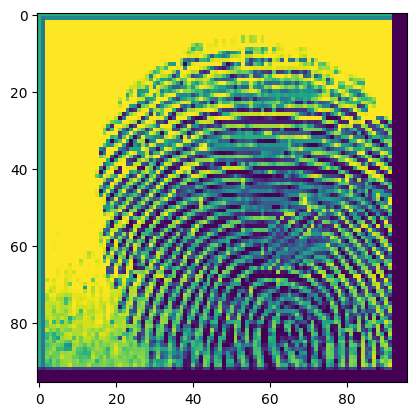

In [16]:
plt.imshow(train_data[1500])

Visualization aids in verifying the success of preprocessing steps and offers insights into the transformed data.

# Convolutional Neural Network (CNN) Model Definition
 A Convolutional Neural Network (CNN) model is defined using TensorFlow and Keras. The model architecture consists of convolutional layers, pooling layers, and fully connected layers.

A Sequential model is defined to organize layers sequentially.
Convolutional layers (Conv2D) with activation functions, max pooling layers (MaxPooling2D), and fully connected layers (Dense) are added in sequence.
Batch normalization (BatchNormalization) and dropout (Dropout) layers can enhance model performance and mitigate overfitting.

In [17]:
# Importing Components
# Necessary components from TensorFlow and Keras, including layers and optimizers, are imported.

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform', input_shape = [96, 96, 1]),
MaxPooling2D(2),
Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
MaxPooling2D(2),
Flatten(),
Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
Dense(1, activation = 'sigmoid'),
])
model.summary()


model.compile(optimizer = optimizers.Adam(1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2

# Model Summary:
The model.summary() method provides a concise overview of the model's architecture, including layer types, shapes, and parameters.

# Compilation:
The model is compiled with an Adam optimizer (optimizers.Adam), a binary cross-entropy loss function ('binary_crossentropy'), and accuracy as the evaluation metric.

# Early Stopping:
An early stopping callback is created to monitor validation loss during training and halt training if improvement stagnates.

# Purpose:
This code defines a CNN model architecture suitable for gender classification from fingerprint images.
The model is equipped with appropriate activation functions, initializers, and regularization techniques to enhance its learning capabilities.

In [18]:
type(labels)

numpy.ndarray

# Model Training
The defined CNN model is trained using the provided dataset. Training involves iterating over epochs, updating model parameters, and monitoring performance on training and validation data.

This code trains the CNN model to recognize gender from fingerprint images and optimizes its parameters based on the provided dataset.

In [19]:
history = model.fit(train_data, labels, batch_size = 128, epochs = 24,
          validation_split = 0.2, callbacks = [early_stopping_cb], verbose = 1)

Epoch 1/24
308/308 [==============================] - 599s 2s/step - loss: 0.5415 - accuracy: 0.7993 - val_loss: 0.4188 - val_accuracy: 0.8142
Epoch 2/24
308/308 [==============================] - 595s 2s/step - loss: 0.3370 - accuracy: 0.8539 - val_loss: 0.3025 - val_accuracy: 0.8693
Epoch 3/24
308/308 [==============================] - 681s 2s/step - loss: 0.2141 - accuracy: 0.9130 - val_loss: 0.2038 - val_accuracy: 0.9183
Epoch 4/24
308/308 [==============================] - 664s 2s/step - loss: 0.1201 - accuracy: 0.9553 - val_loss: 0.1884 - val_accuracy: 0.9202
Epoch 5/24
308/308 [==============================] - 628s 2s/step - loss: 0.0717 - accuracy: 0.9757 - val_loss: 0.1260 - val_accuracy: 0.9473
Epoch 6/24
308/308 [==============================] - 611s 2s/step - loss: 0.0482 - accuracy: 0.9844 - val_loss: 0.1176 - val_accuracy: 0.9575
Epoch 7/24
308/308 [==============================] - 625s 2s/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.1036 - val_accuracy: 0.9616

# Model Training:
The model.fit function trains the model using the preprocessed train_data and corresponding labels.
Parameters include batch_size, epochs, and validation_split.

# Batch Size and Epochs:
The batch_size parameter specifies the number of samples processed in each training iteration.
The epochs parameter defines the number of times the entire dataset is iterated over during training.

# Validation Split:
The validation_split parameter splits a portion of the data for validation, enabling monitoring of model performance on unseen data.

# Early Stopping Callback:
The early_stopping_cb callback halts training if validation loss does not improve for a certain number of epochs, specified by patience.

# Verbose Mode:
The verbose parameter controls the level of output displayed during training. A value of 1 provides updates for each epoch.

# Purpose:
This code segment conducts the model's learning process, where it adjusts its parameters to minimize the loss function and improve accuracy.
Training is performed on the preprocessed data while monitoring performance on validation data.

# Test Data Loading and Preparation
This code segment loads and prepares the test data from the "Real" path for evaluating the trained model's performance. The extracted labels and features are stored in x_test and y_test lists.

In [20]:
test_data = loading_data(Real_path,False)

x_test,y_test= [], []
for label, feature in test_data:
    y_test.append(label)
    x_test.append(feature)

1000
2000
3000
4000
5000
6000


# Test Data Loading:
The loading_data function is applied to the Real_path to load test data from authentic fingerprint images.

# Label and Feature Collection:
A loop iterates through each test data entry, extracting the label and feature.
The label is appended to the y_test list, and the feature (image) is appended to the x_test list.

# Purpose:
This code snippet  effectively loads, labels, and prepares test data from the "Real" path, setting the stage for evaluating the trained model's accuracy and performance on authentic fingerprint images.

Extracted features (x_test) and labels (y_test) are essential for evaluating the model's predictions against ground truth.

# Test Data Preprocessing
The loaded test data is preprocessed to align with the format suitable for model evaluation. The test images are reshaped, and the corresponding labels are converted into NumPy arrays.

In [21]:
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
type(y_test)

numpy.ndarray

# Reshaping Test Images:
The loaded test images, stored in the x_test list, are reshaped using np.array(x_test).reshape(-1, img_size, img_size, 1).
Reshaping ensures that the test images match the expected input dimensions of the trained model
.
# Label Array Conversion:
The labels for the test data, stored in the y_test list, are converted into a NumPy array using np.array(y_test).

# Label Data Type Check:
The type of y_test is checked using the type() function to confirm that it is a NumPy array.

Conversion to NumPy arrays ensures compatibility with model input requirements and evaluation functions.

# Model Evaluation on Test Data
The trained model is evaluated on the prepared test data using the evaluate method. This assesses the model's accuracy and performance on authentic fingerprint images.

In [22]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 22s 116ms/step - loss: 4.6195 - accuracy: 0.9920


[4.619489669799805, 0.9919999837875366]

# Model Evaluation:
The model.evaluate method is used to evaluate the trained model's performance on the test data.
The x_test array contains the preprocessed test images, and y_test contains the corresponding labels.

# Purpose:
Model evaluation provides insights into how accurately the trained model predicts gender from authentic fingerprint images.

# Training Curves Visualization
In this visualization, the training and validation curves are displayed to illustrate the model's progression in terms of accuracy and loss throughout the training process.

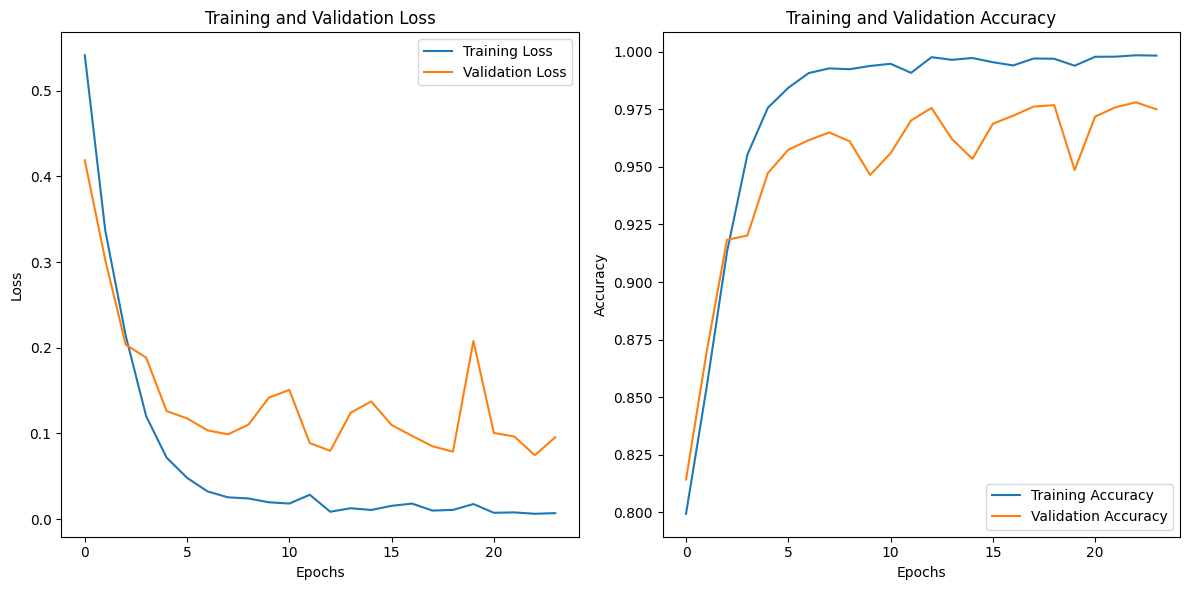

In [23]:
# Access training history from the 'history' object
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Training and Validation Loss Trend:

The left subplot showcases the trend of both training and validation loss across epochs.
As training progresses, the goal is to observe a decrease in loss values, indicating improved convergence.
# Training and Validation Accuracy Trend:

The right subplot demonstrates the evolution of training and validation accuracy over epochs.
Increasing accuracy values over time indicate the model's ability to better classify gender from fingerprint images.
# Interpreting the Curves:

A downward trend in the loss curves reflects the model's successful convergence as it learns to make better predictions.
An upward trend in the accuracy curves signifies improved model performance in accurately identifying gender.
# Early Stopping Point:

The validation curves can also help identify when overfitting occurs. If validation loss starts to increase while training loss continues to decrease, it could indicate overfitting.
# Importance of Curves:

Monitoring these curves is crucial for assessing model progress and ensuring it is learning effectively without overfitting.
The visualization empowers you to make informed decisions about training duration and model performance.

# Confusion Matrix Visualization
This code snippet visualizes the confusion matrix to gain insights into the performance of the trained model's predictions on the test data. The confusion matrix illustrates true positive, true negative, false positive, and false negative classifications.

---



188/188 [==============================] - 21s 109ms/step
6000


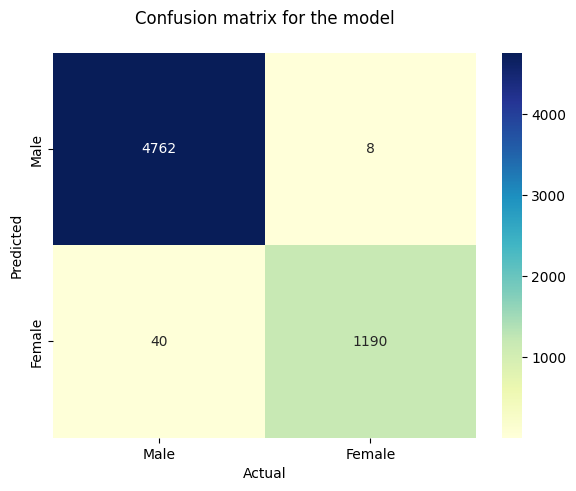

In [24]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 5))

preds = model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['Male', 'Female'], columns=['Male', 'Female'])
plt.subplot(121)
plt.title("Confusion matrix for the model\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

print(len(y_test==1))

# Import and Setup:
The confusion_matrix function is imported from sklearn.metrics.
Matplotlib and Seaborn libraries are used for visualization.

# Prediction and Thresholding:
Model predictions are obtained using model.predict(x_test).
Predictions are thresholded at 0.5 (rounded to nearest integer) to classify as either 0 or 1 (male or female).

# Confusion Matrix Calculation:
The confusion matrix is calculated using confusion_matrix(y_test, preds) where y_test is the true labels and preds are the model predictions.

# Confusion Matrix Visualization:
A heatmap of the confusion matrix is plotted using Seaborn.
The heatmap displays true positive, true negative, false positive, and false negative counts.

# Classification Report
This code snippet generates and displays a comprehensive classification report that presents key metrics for evaluating the performance of the trained model on the test data. The report includes metrics such as **precision**, **recall**, **F1-score**, and support for each class.

In [25]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, preds)

print("CLASSIFICATION REPORT")
print(cr)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4770
           1       0.99      0.97      0.98      1230

    accuracy                           0.99      6000
   macro avg       0.99      0.98      0.99      6000
weighted avg       0.99      0.99      0.99      6000



# Import and Calculation:
The classification_report function is imported from sklearn.metrics.
The function calculates and generates a classification report based on the true labels (y_test) and predicted labels (preds).

# Classification Report Display:
The classification report is stored in the variable cr.
The report is then printed using print(cr).
# Purpose:

The classification report provides a detailed overview of model performance, including metrics for precision, recall, F1-score, and support for each class (male and female).
This report aids in understanding the model's ability to correctly classify gender from fingerprint images.

# Model Saving
This code snippet saves the trained model to a file named 'GROUP_E_MODEL.h5'. The saved model file can be used for future predictions or further analysis.

In [ ]:
model.save('GROUP_E_MODEL.h5')

# Model Predictions and Visualizations
This code snippet iterates through a selection of test data instances, makes predictions using the trained model, and displays both the true label, predicted probability, and the corresponding fingerprint image.



True:  0
1/1 [==============================] - 0s 39ms/step
predicted:  [0.]



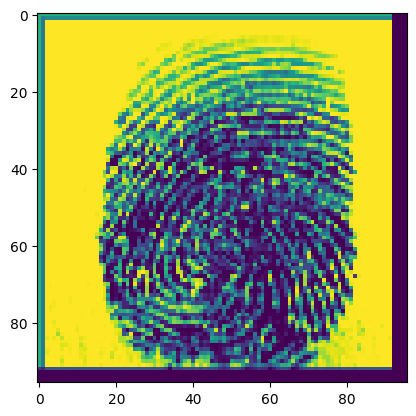

True:  0
1/1 [==============================] - 0s 41ms/step
predicted:  [0.]



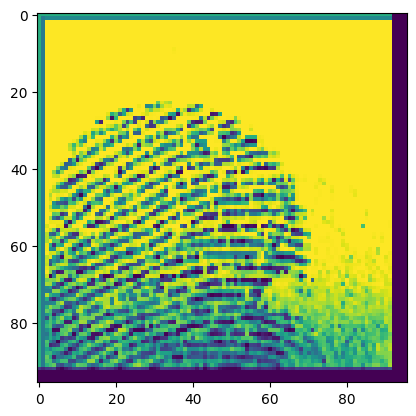

True:  0
1/1 [==============================] - 0s 35ms/step
predicted:  [0.]



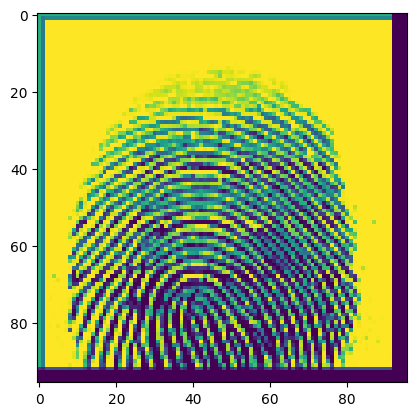

True:  0
1/1 [==============================] - 0s 36ms/step
predicted:  [0.]



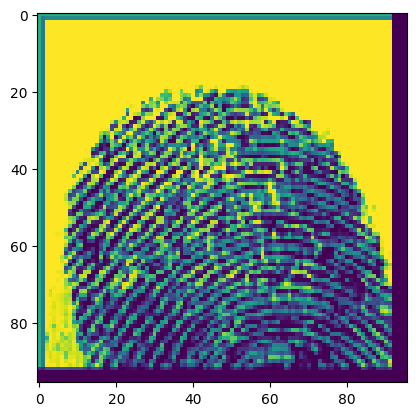

True:  0
1/1 [==============================] - 0s 36ms/step
predicted:  [0.]



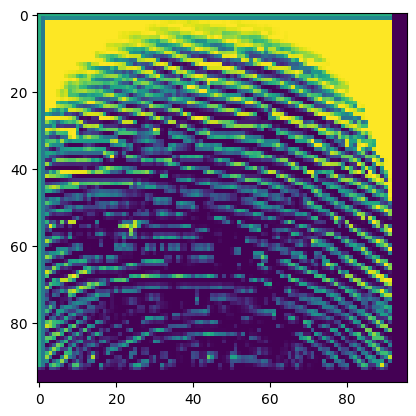

In [26]:
for i in range(5):
    print('True: ',y_test[i])
    print('predicted: ',model.predict(np.expand_dims(x_test[i],0))[0])
    print()
    plt.imshow(x_test[i])
    plt.show()

# Prediction and Visualization Loop:

The loop iterates i over a range of 5, indicating the number of instances to examine.
For each iteration:
The true label (y_test[i]) is printed.
The model's prediction for the corresponding image (model.predict(np.expand_dims(x_test[i],0))[0]) is printed.
The fingerprint image is displayed using plt.imshow and then shown using plt.show().

# Purpose:
This code effectively showcases model predictions and visualizes fingerprint images to assess the model's accuracy on individual instances from the test dataset.